# Outline


# Likelyhood Test For Linear Restriction On The Coefficients.

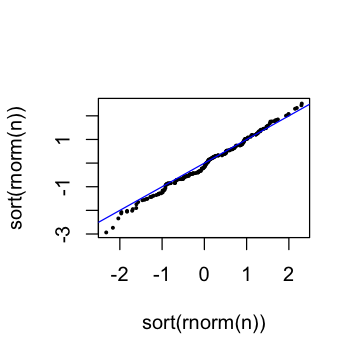

In [46]:
options(repr.plot.width=3, repr.plot.height=3)
options(warn = -1)
set.seed(47)

n <- 200
plot(sort(rnorm(n)), sort(rnorm(n)), pch=19, cex = 0.3)
abline(0,1, col='blue')

The general formula for median L-test statistic, given the linear restriction is $Rb = r$, is 
<br />
<br />
\begin{align}
8\left(\frac{\tilde{v}_{n}(0.5) - \hat{v}_{n}(0.5)}{\left(f(F^{-1}(0.5))\right)^{-1}}\right) \sim^{D} \chi_{q}^{2},
\end{align}
<br />
where 
<br /><br />
\begin{align*}
\hat{v}_{n}(\tau) = \min_{b \in \mathbb{R}^{p}}\sum \rho_{\tau}(y_{i} - x_{i}^{'}b),
\end{align*}
<br /><br />
\begin{align*}
\tilde{v}_{n}(\tau) = \min_{b \in \mathbb{R}^{p}, Rb = r}\sum \rho_{\tau}(y_{i} - x_{i}^{'}b).
\end{align*}
<br />
With standard Laplacen disturbance, we know $\left(f(F^{-1}(0.5))\right)^{-1} = 4$. 
Set
<br /><br />
\begin{align*}
& H_{0}: y = \beta_{0} + \beta_{1}x_{1} + e\\
& H_{1}: y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + e
\end{align*}
<br />
We can see the L-statistic is actually distributed the same as $\chi_{1}^{2}$ when $y = 1 - 0.4x_{1} + e$ is the true DGP.

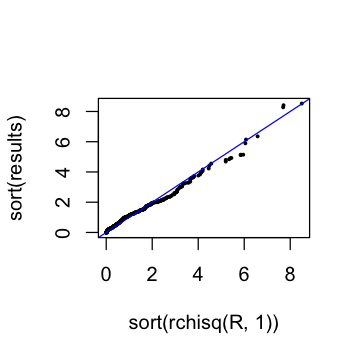

In [47]:
library(quantreg)
library(rmutil)


n <- 200
R <- 500
beta1 <- -0.4
beta2 <- 0.0
x1 <- rnorm(n, mean=0, sd=2)
x2 <- rnorm(n, mean=0, sd=2)
e <- rlaplace(n, m=0, s=2)



results <- rep(0, R)
for (i in 1:R) {
    e <- rlaplace(n, m=0, s=2)
    y <- 1 + x1 * beta1 + x2 * beta2 + e
    results[i] <- 2 * (sum(0.5 * abs(rq(y~1 + x1)$resi)) - sum(0.5 * abs(rq(y~1 + x1 + x2)$resi)))
}

plot(sort(rchisq(R, 1)), sort(results), pch=19, cex = 0.3)
abline(0,1, col='blue')


Of course, when $\beta_{2} \not= 0$, L-test statistics is no longer a chi-square with df 1 distributtion.

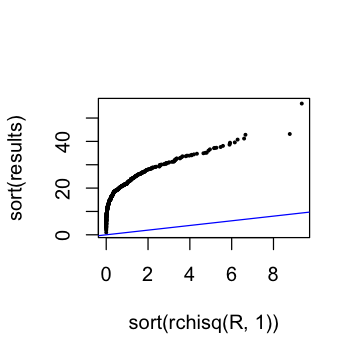

In [48]:
beta2 <- 0.3


results <- rep(0, R)
for (i in 1:R) {
    e <- rlaplace(n, m=0, s=2)
    y <- 1 + x1 * beta1 + x2 * beta2 + e
    results[i] <- 2 * (sum(0.5 * abs(rq(y~1 + x1)$resi)) - sum(0.5 * abs(rq(y~1 + x1 + x2)$resi)))
}

plot(sort(rchisq(R, 1)), sort(results), pch=19, cex = 0.3)
abline(0,1, col='blue')


Here we test some other distribution (of the distrubance). Standard normal is used, and we need to compute the $\left(f(F^{-1}(0.5))\right)^{-1}$ by ourself. For standard normal, $\left(f(F^{-1}(0.5))\right)^{-1} = f(0)^{-1}$.

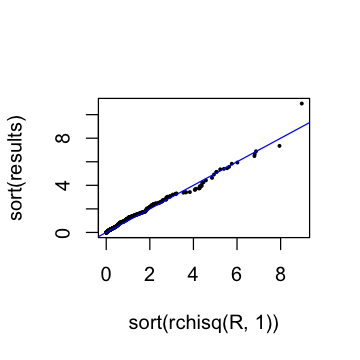

In [49]:
beta2 <- 0.0

results <- rep(0, R)
for (i in 1:R) {
    e <- rnorm(n)
    y <- 1 + x1 * beta1 + x2 * beta2 + e
    results[i] <- 8 * (sum(0.5 * abs(rq(y~1 + x1)$resi)) - sum(0.5 * abs(rq(y~1 + x1 + x2)$resi))) / dnorm(0)^{-1}
}

plot(sort(rchisq(R, 1)), sort(results), pch=19, cex = 0.3)
abline(0,1, col='blue')



Let's say we don't know what is the underlying distribution, then how can we construct $\widehat{\left({f}(F^{-1}(0.5))\right)^{-1}}$ from the sample?
<br /><br />
We will leave the general question alone, and focus on simply the computation of $\left(f(F^{-1}(0.5))\right)^{-1}$, given the distribution. As the santdard normal's pdf is symmetric, we find the computation of this quantity is still easy. For exponential distribution, life become a little bit tougher. We use Siddiqui(1960)
<br />
<br />
\begin{align*}
\widehat{\left({f}(F^{-1}(0.5))\right)^{-1}} = \frac{\left[\hat{F}_{n}^{-1}(0.5 + h_{n}) - \hat{F}_{n}^{-1}(0.5 - h_{n})\right]} {2h_{n}},
\end{align*}
<br />
for some $h_{n} \downarrow 0$, and \begin{align*}
\hat{F}_{n}(t) = \frac{1}{n} \sum_{i=1}^{n}1_{\left(x_{i}\le t\right)}.
\end{align*}

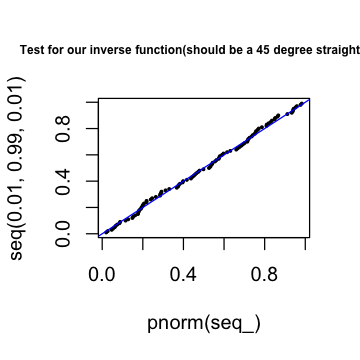

In [50]:
inverse <- function (f, lower = -100, upper = 100) {
   function (y) uniroot((function (x) f(x) - y), lower = lower, upper = upper)[1]$root
}

F <- function(samples) {
    result <- function(t) {
        len_ <- length(samples)
        sum(samples <= t) / len_
    }
    return(result)
}
x <- rnorm(n)
fun_ <- F(x)
F_inverse <- inverse(fun_, -100, 100)

#Test                         
seq_ <- sapply(FUN=F_inverse, seq(0.01,0.99,0.01))
plot(pnorm(seq_), seq(0.01,0.99,0.01), main="", pch=19, cex = 0.3)
title(main="Test for our inverse function(should be a 45 degree straight line)", cex.main=0.6)                     
abline(0,1, col='blue')

The following we use the formula. We still not try to data-drive $\widehat{\left({f}(F^{-1}(0.5))\right)^{-1}}$.  Instead, we separately estimate this quantity and plug in the result for the L-test statistic.
<br />
<br />
Everything is as we've expected, just that the choice of $h_{n}$ can bring in some suprise if we are being too careless.

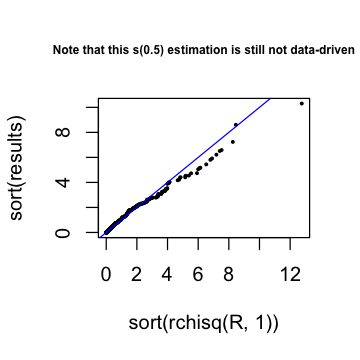

In [45]:
beta2 <- 0.0

u <- rexp(500000)
hn <- 0.001
fun_ <- F(u)
F_inverse <- inverse(fun_, -100, 100)

s_hat <- (F_inverse(0.5 + hn) - F_inverse(0.5 - hn)) / (2 * hn)
#s_hat#Caution!

results <- rep(0, R)
for (i in 1:R) {
    e <- rexp(n)
    y <- 1 + x1 * beta1 + x2 * beta2 + e
    results[i] <- 8 * (sum(0.5 * abs(rq(y~1 + x1)$resi)) - sum(0.5 * abs(rq(y~1 + x1 + x2)$resi))) / s_hat
}

plot(sort(rchisq(R, 1)), sort(results), pch=19, main="", cex = 0.3)
title(main="Note that this s(0.5) estimation is still not data-driven", cex.main=0.6)
abline(0,1, col='blue')


# Test the structure hypothese

Suppose we want to figure out whether a data set could be generated from the DGP 
<br /><br />
\begin{align*}
y = \beta^{'} x  + x\varepsilon,
\end{align*}
<br />
then we need to make a test based on estimated quantile coefficeitns process, $\hat{\beta}(\tau), 0 < \tau < 1$.

Here we do a simulate that show how does it looks like for the convergence of a empirical process. Samples $x_{1}, \dots, x_{n}$ are generated from standard normal, the darker the line, the larger the sample size.
<br />
<br />
\begin{align*}
\hat{F}(t)_{n} = \frac{1}{n} \sum_{i=1}^{n}1_{\left(x_{i}\le t\right)}, -2 \le t \le 2.
\end{align*}

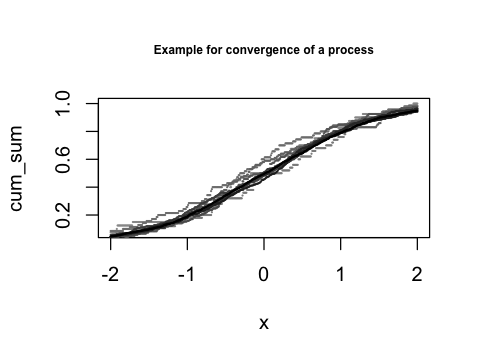

In [31]:
options(repr.plot.width=4, repr.plot.height=3)
n <- c(40, 50, 70, 100, 120, 170, 250, 300, 450, 500, 2000)

x <- seq(-2., 2., by=0.01)
len <- length(x)
j <- 1
col_indexes <- c("gray60", "gray55", "gray50", "gray45", "gray40", "gray35", "gray30", "gray25", "gray20", "gray15", "black")


for (n_ in n) {
    data <- rnorm(n_, 0, 1.2)
    cum_sum <- rep(0, len)

    for (i in 1:len) {
        cum_sum[i] <- sum(data <= x[i]) / n_
    }
    
    if (n_ == 40) {
        plot(x, cum_sum, pch=19, cex = 0.1, col = col_indexes[j], main="")
        title(main="Example for convergence of a process", cex.main=0.6)
    } else {
        points(x, cum_sum, pch=19, cex = 0.1, col = col_indexes[j])
    }
    
    j = j + 1
}



Having seen what's the look of a convergence of a process, here we provide the convergence of $\hat{\beta}(\tau), 0.2 < \tau < 0.8$ when the underlying DGP is location-shit model,
<br /><br />
\begin{align*}
y = \beta^{'} x + e
\end{align*}

[1] "A we've anticipated, beta_hat processes ocillated around some constants"


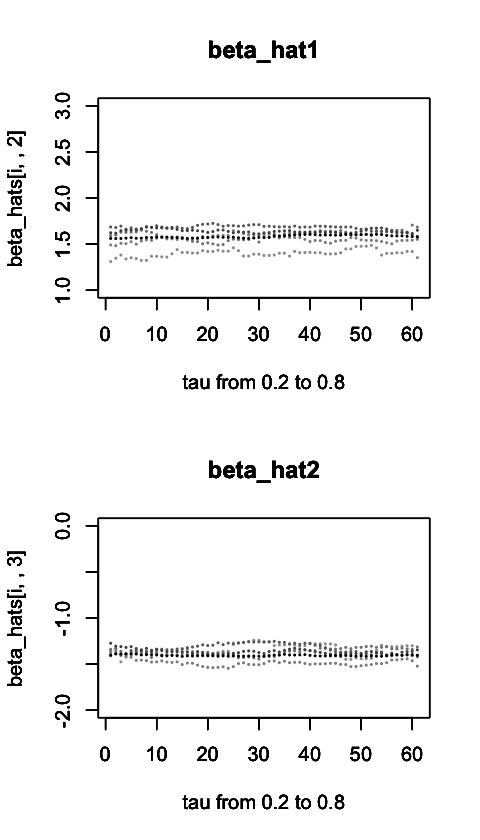

In [33]:

#####
n <- c(100,200,300,500,600,4000)
tau <- seq(0.2, 0.8, by=0.01)
beta <- c(1.6, -1.4)
gamma <- c(-1.57, 1)

beta_hats <- array(0, c(length(n), length(tau), 3))
j <- 1

for (n_ in n) {
    x <- array(rnorm(2 * n_), c(n_, 2))
    e <- rt(n_, df = 50)
    
    y <- 1.7 + x %*% beta + e
    
    k <- 1
    
    for (tau_ in tau) {
        beta_hats[j, k,] <- rq(y~x, tau=tau_)$coef
        k <- k + 1
    }
    
    j <- j + 1
}


col_indexes <- c("gray60", "gray50", "gray55", "gray40", "gray30", "black", "gray35", "gray30", "gray25", "gray20", "gray15", "black")
par(mfcol=c(2,1))
options(repr.plot.width=4, repr.plot.height=7)

print("As we've anticipated, beta_hat processes ocillated around some constants")
for (i in 1:length(n)) {
    plot(beta_hats[i, , 2], ylim = c(1,3), pch=19, cex =0.2, col=col_indexes[i], main="beta_hat1", xlab="tau from 0.2 to 0.8")
    par(new=TRUE)
}
par(new=FALSE)
for (i in 1:length(n)) {
    plot(beta_hats[i, , 3], ylim = c(-2,0), pch=19, cex =0.2, col=col_indexes[i], main="beta_hat2", xlab="tau from 0.2 to 0.8")
    par(new=TRUE)
}
par(new=FALSE)

On the other hand, when location-scale shift model is the underlying DGP,
<br />
<br />
\begin{align*}
y = \beta_{0} + \beta^{'}x + (1+\gamma^{'}x)^{2}e
\end{align*}
<br />
we are going to see the following $\hat{\beta}(\tau)$ figures as sample size getting larger:

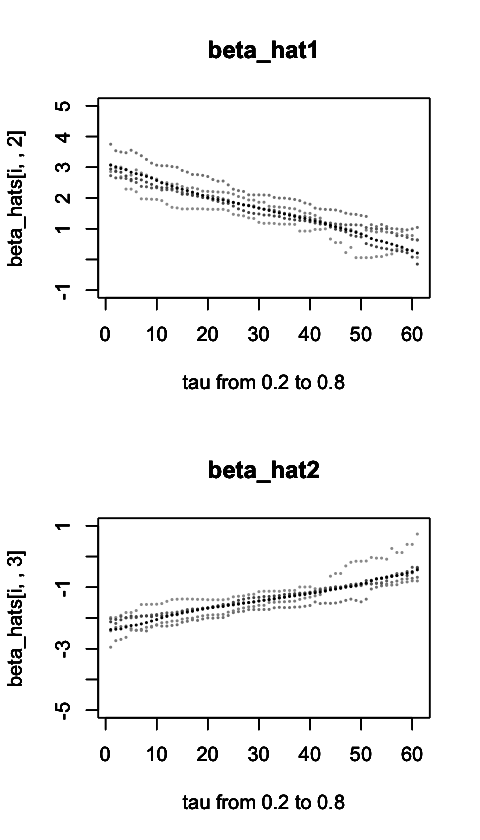

In [19]:
n <- c(100,200,300,500,600,4000)
tau <- seq(0.2, 0.8, by=0.01)
beta <- c(1.6, -1.4)
gamma <- c(-1.57, 1)

beta_hats <- array(0, c(length(n), length(tau), 3))
j <- 1

for (n_ in n) {
    x <- array(rnorm(2 * n_), c(n_, 2))
    e <- rt(n_, df = 50)
    
    y <- 1.7 + x %*% beta + (1 + x %*% gamma)^{2} * e
    
    k <- 1
    
    for (tau_ in tau) {
        beta_hats[j, k,] <- rq(y~x, tau=tau_)$coef
        k <- k + 1
    }
    
    j <- j + 1
}


col_indexes <- c("gray60", "gray50", "gray55", "gray40", "gray30", "black", "gray35", "gray30", "gray25", "gray20", "gray15", "black")
par(mfcol=c(2,1))
options(repr.plot.width=4, repr.plot.height=7)


for (i in 1:length(n)) {
    plot(beta_hats[i, , 2], ylim = c(-1,5), pch=19, cex =0.2, col=col_indexes[i], main="beta_hat1", xlab="tau from 0.2 to 0.8")
    par(new=TRUE)
}
par(new=FALSE)
for (i in 1:length(n)) {
    plot(beta_hats[i, , 3], ylim = c(-5,1), pch=19, cex =0.2, col=col_indexes[i], main="beta_hat2", xlab="tau from 0.2 to 0.8")
    par(new=TRUE)
}
par(new=FALSE)


This example is from Koenker and Xiao (2002), and the data is from Pennsylvania unemployment bonus experiments. If the individual get reemployed within a specific qualification period, she/he will receive a cash bonus. <br />
$T_{i}$: Duration of spells of unemployment.<br />
$x_{i}$ contian gender, treatments, races, etc.<br />
Estimated equation: $\log(T_{i}) = \beta^{'} x_{i} + e_{i}$

![image](../Desktop/keo1.png)

![image](../Desktop/keo2.png)

We however skip the detail of the construction of the statistics. These graphs are good enough for a fine judgement.

# Resampling

Delete-one jacknife estimate of the sample variance for $\bar{x}$:

\begin{align*}
v_{n} \equiv \frac{n-1}{n}\sum_{i=1}^{n}\left(\hat{m}_{(i)} - \hat{m}_{(.)}\right),
\end{align*}

where $\hat{m}_{(i)}$ is the mean estimator of sample with $i$-th element deleted, and $\hat{m}_{(.)}$ is the average of $\hat{m}_{(i)}$'s.

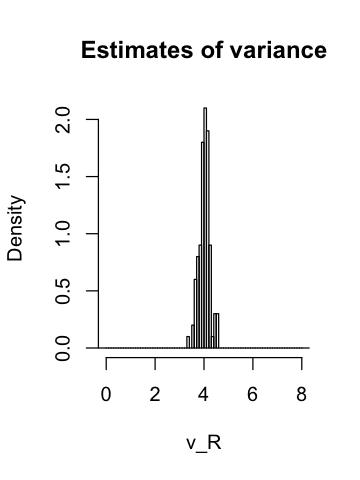

In [21]:
options(repr.plot.width=3, repr.plot.height=4)
n <- 700
R <- 100
v_R <- rep(0, R)
break_ <- c(-1000, seq(0,8,by=0.1), 1000)

for (r in 1:R) {
    x <- rnorm(n, 0, 2)
    results <- rep(0, n)

    for (i in 1:n) {
        results[i] <- mean(x[-i])
    }

    v_R[r] <- n * ((n-1) / n) * sum((results - mean(results))^{2})
}

hist(v_R, xlim=c(0,8), main="Estimates of variance", breaks=break_)

Normalized $v_{n}$ converges to true variance(4 here) in probability.

However, Efron(1982) has pointed out that jacknife estimate of the sample variance does not apply to median estimator.

[1] "Figure1. The variance of this median is 6.2832"
[1] "Figure2. These guys converge to a distribution, rather than the constant 6.2832"


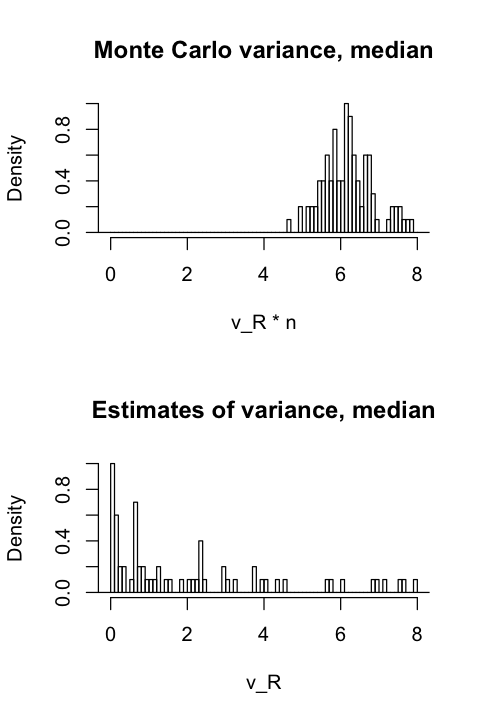

In [36]:
options(repr.plot.width=4, repr.plot.height=6)
n <- 700
B <- 100
R <- 200
v_R <- rep(0, B)
break_ <- c(-10000, seq(0,8,by=0.1), 10000)
results <- rep(0, R)

for (b in 1:B) {
    for (r in 1:R) {
        x <- rnorm(n, 0, 2)
        results[r] <- median(x)
    }
    v_R[b] <- var(results)
}
par(mfcol = c(2,1))

print(paste0("Figure1. The variance of this median is ", round((dnorm(0, 0, 2)^{2} * 4)^{-1}, 4)))
hist(v_R  * n, xlim=c(0,8), main="Monte Carlo variance, median", breaks=break_)





R <- 100
v_R <- rep(0, R)


for (r in 1:R) {
    x <- rnorm(n, 0, 2)
    results <- rep(0, n)
    for (i in 1:n) {
        results[i] <- median(x[-i])
    }
    v_R[r] <- n * ((n-1) / n) * sum((results - median(results))^{2})
}
print(paste0("Figure2. These guys converge to a distribution, rather than the constant ", round((dnorm(0, 0, 2)^{2} * 4)^{-1}, 4)))
hist(v_R, main="Estimates of variance, median", xlim=c(0,8), breaks=break_)
    


As $n$ is even,
<br /><br />
\begin{align*}\hat{m}_{(j)} = \begin{cases} x_{(n/2+1)},  j \le n/2, \\ x_{(n/2)}, j > n/2.\end{cases}\end{align*}

And 
<br /><br />
\begin{align*}
\hat{m}_{(.)} = \frac{x_{(n/2)} + x_{(n/2+1)}}{2}.
\end{align*}
<br />
So $v_{n} = \frac{n-1}{4}\left(x_{(n/2+1)} - x_{(n/2)}\right)^{2}$. And we have
<br /><br />
\begin{align*}
nv_{n} \rightarrow^{D} \frac{1}{4f^{2}(F^{-1}(0.5))}\left(\chi^{2}_{2}\right)^{2},
\end{align*}
<br />
which is a distribution.

Here's the idea that I am not sure it's completely correct. Given random raviables $X_{j}$ independently drawn from the distribution $F$, the difference between sample median and the third quarter is a consistent estimator for $F^{-1}(0.75) - F^{-1}(0.5)$. This works for any other two predetermined quantiles. If we use quantile to express the ordered statistic of $X_{j}$ that is one step larger than $X_{(n/2)}$, $X_{(n/2 + 1)}$ is actually a quantile with $\tau_{n} \downarrow 0.5$.

The convergent rate of $x_{(n/2+1)} - x_{(n/2)}$ is of order $\frac{1}{n}$. To a distribution $\lim n(x_{(n/2+1)} - x_{(n/2)})$:

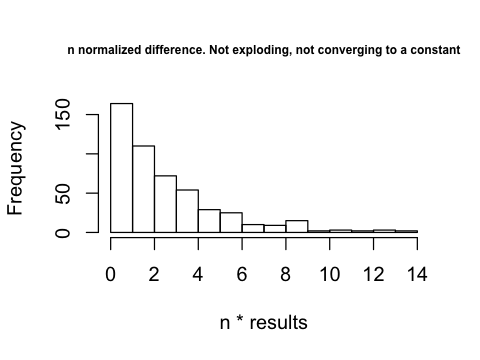

In [26]:
options(repr.plot.width=4, repr.plot.height=3)
R <- 500
n <- 10000
results <-rep(0, R)
for (i in 1:R) {
    x <- rnorm(n)
    results[i] <- sort(x)[floor(0.5 * n) + 1] - sort(x)[floor(0.5 * n)]
}

hist(n * results, caption="", main = "")
title(main="n normalized difference. Not exploding, not converging to a constant", cex.main=0.6)

# Bootstrap

Now we take a look at how bootstrap can be applied to i.i.d qr. Steps are all the same as we did in OLS, but the analysis results are different.

Simulate $y_{i} = \beta x_{i} + e_{i}$, $e_{i} \sim_{iid} F$:

In [28]:
#library(quantreg)

n <- 3000
beta <- 0.7
x <- rnorm(n)
y <- beta * x + rexp(n)
e_hat <- rq(y ~ x)$resi
beta_hat <- rq(y ~ x)$coef
round(beta_hat, 4)


(Intercept)           x 
     0.7046      0.6618

We now have $\hat{e}_{i}$ and $\hat{\beta}_{\tau}$. Then we bootstrap $\hat{e}_{i}$ and use them as well as $\hat{\beta}_{\tau}$, $x_{i}$'s to create $y^{*}_{i}$'s.

Specifically, given $B$, we re-sample $\hat{e}_{i}$ with replacement with size $n$ for $B$ times. Let's call the re-sampling residuals ${e_{i, b}^{*}}$, $i = 1, \dots, n$, $1 \le b \le B$, and $y^{*}_{i, b} = x_{i}^{'} \hat{\beta}_{\tau} + e^{*}_{i,b}$.

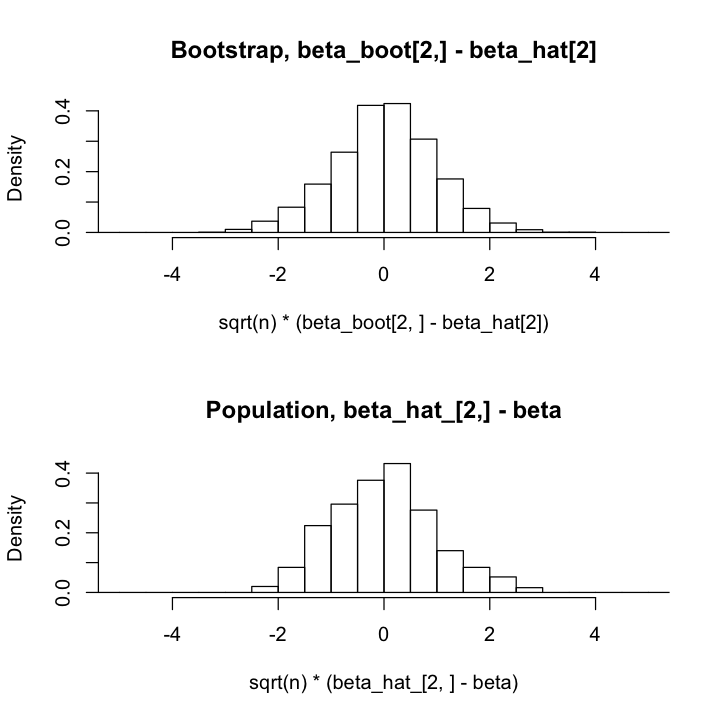

In [29]:
options(repr.plot.width=6, repr.plot.height=6)
B <- 2000
e_boot <- rep(0, B)
y_boot <- rep(0, B)
beta_boot <- array(0, c(2, B))
break_ <- c(-100, seq(-5, 5, by =0.5), 100)

for (b in 1:B) {
    e_boot <- e_hat[sample(1:n, n, replace = TRUE)]
    y_boot <- cbind(1, x) %*% beta_hat + e_boot
    beta_boot[,b] <- rq(y_boot ~ x)$coef
}
par(mfcol = c(2,1))
hist(sqrt(n) * (beta_boot[2,] - beta_hat[2]), xlim = c(-5, 5), breaks=break_, main="Bootstrap, beta_boot[2,] - beta_hat[2]")



R <- 500
beta_hat_ <- array(0, c(2, R))

for (r in 1:R) {
    x <- rnorm(n)
    y <- beta * x + rexp(n)
    e_hat <- rq(y ~ x)$resi
    beta_hat_[,r] <- rq(y ~ x)$coef
}

hist(sqrt(n) * (beta_hat_[2,] - beta), xlim = c(-5, 5), breaks=break_, main="Population, beta_hat_[2,] - beta")


That was for the iid case. To deal with the more pratical(I doubt it) case with independent but not necessarily identical distributed distrubance, we can use

(Intercept)           x 
     0.3473      0.6614

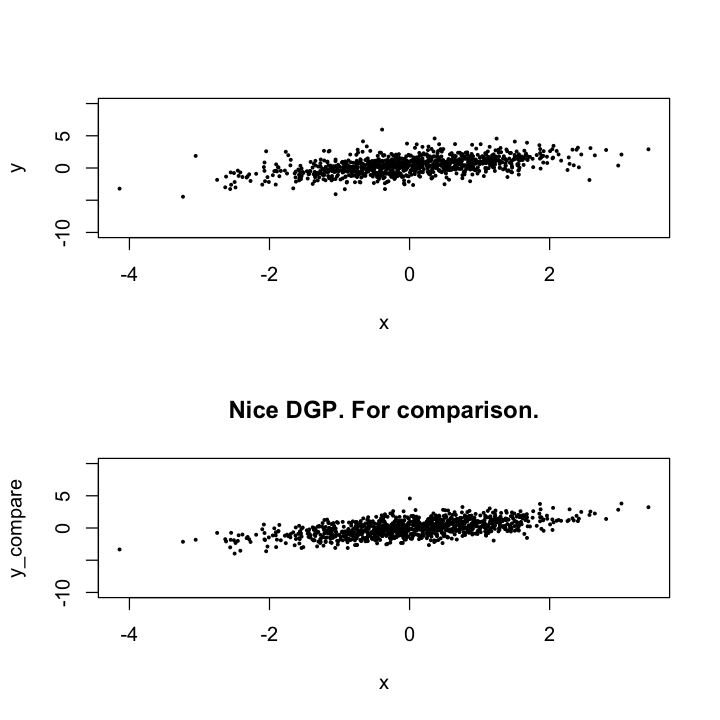

In [30]:
#The previous case:
#x <- rnorm(n)
#y <- beta * x + rexp(n)
options(repr.plot.width=6, repr.plot.height=6)
n <- 1000
beta <- 0.7
x <- rnorm(n)
u <- cbind(rexp(n, 1), rt(n, df=20), rnorm(n))
rand_ <- sample(1:3, n, replace=TRUE)

e <- rep(0, n)
e[rand_==1] <- u[rand_==1,1]
e[rand_==2] <- u[rand_==2,2]
e[rand_==3] <- u[rand_==3,3]
y <- beta * x + e
par(mfcol=c(2,1))
plot(x, y, ylim = c(-10,10), pch=19, cex = 0.3)

e_compare <- rnorm(n)
y_compare <- beta * x + e_compare
plot(x, y_compare, main="Nice DGP. For comparison.", ylim = c(-10,10), pch=19, cex = 0.3)


e_hat <- rq(y ~ x)$resi
beta_hat <- rq(y ~ x)$coef
round(beta_hat, 4)

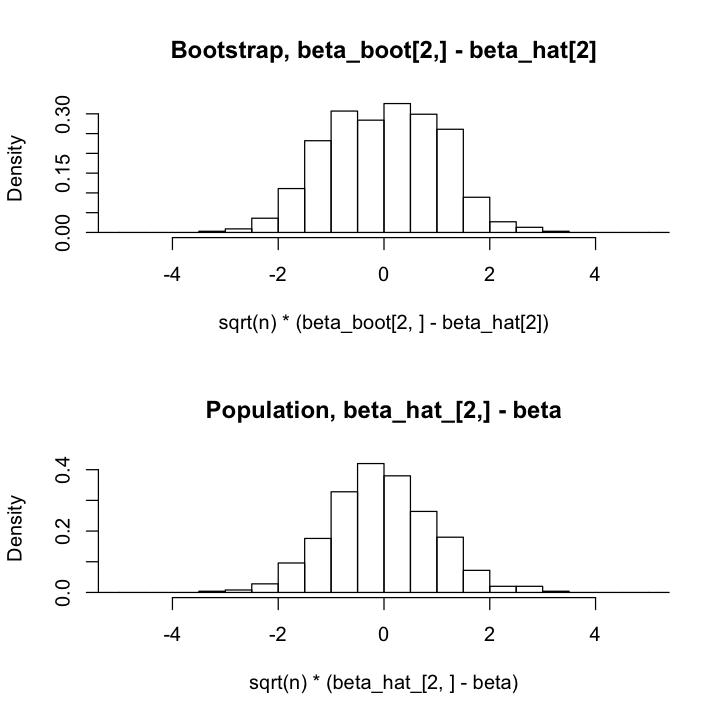

In [8]:

B <- 2000
e_boot <- rep(0, B)
y_boot <- rep(0, B)
beta_boot <- array(0, c(2, B))
break_ <- c(-100, seq(-5, 5, by =0.5), 100)

for (b in 1:B) {
    sample_ <- sample(1:n, n, replace = TRUE)
    x_boot <- x[sample_]
    y_boot <- y[sample_]
    beta_boot[,b] <- rq(y_boot ~ x_boot)$coef
}
par(mfcol = c(2,1))
hist(sqrt(n) * (beta_boot[2,] - beta_hat[2]), xlim = c(-5, 5), breaks=break_, main="Bootstrap, beta_boot[2,] - beta_hat[2]")



R <- 500
beta_hat_ <- array(0, c(2, R))

for (r in 1:R) {
    #x <- rnorm(n)
    u <- cbind(rexp(n, 1), rt(n, df=20), rnorm(n))
    rand_ <- sample(1:3, n, replace=TRUE)

    e <- rep(0, n)
    e[rand_==1] <- u[rand_==1,1]
    e[rand_==2] <- u[rand_==2,2]
    e[rand_==3] <- u[rand_==3,3]
    
    y <- beta * x + e
    e_hat <- rq(y ~ x)$resi
    beta_hat_[,r] <- rq(y ~ x)$coef
}

hist(sqrt(n) * (beta_hat_[2,] - beta), xlim = c(-5, 5), breaks=break_, main="Population, beta_hat_[2,] - beta")

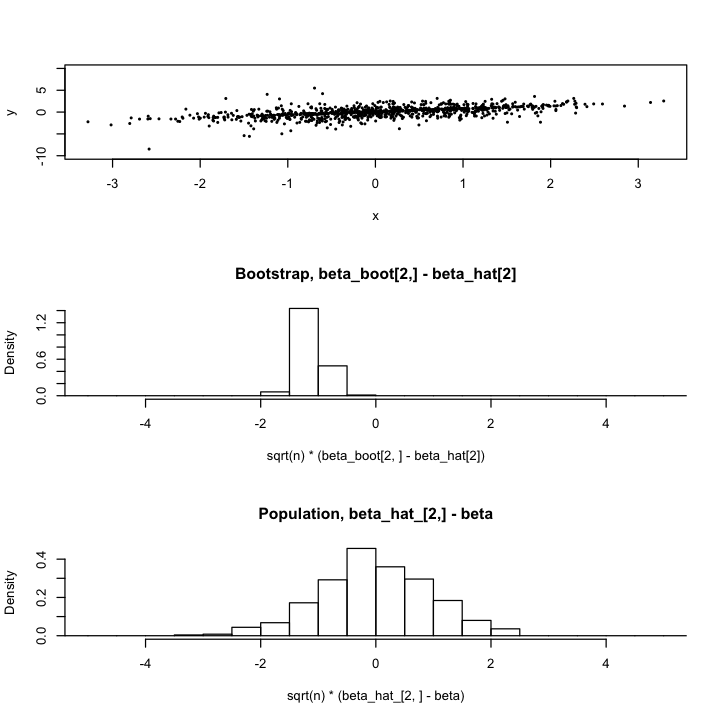

In [9]:

options(repr.plot.width=6, repr.plot.height=6)
n <- 1000
beta <- 0.7
#x <- rnorm(n)
u <- cbind(rexp(n, 10), rt(n, df=3), rnorm(n)) #Bad DGP!
rand_ <- sample(1:3, n, replace=TRUE)

e <- rep(0, n)
e[rand_==1] <- u[rand_==1,1]
e[rand_==2] <- u[rand_==2,2]
e[rand_==3] <- u[rand_==3,3]
y <- beta * x + e
par(mfcol=c(3,1))
plot(x, y, pch=19, cex = 0.3, ylim = c(-10,10))



B <- 2000
e_boot <- rep(0, B)
y_boot <- rep(0, B)
beta_boot <- array(0, c(2, B))
break_ <- c(-100, seq(-5, 5, by =0.5), 100)

for (b in 1:B) {
    sample_ <- sample(1:n, n, replace = TRUE)
    x_boot <- x[sample_]
    y_boot <- y[sample_]
    beta_boot[,b] <- rq(y_boot ~ x_boot)$coef
}

hist(sqrt(n) * (beta_boot[2,] - beta_hat[2]), xlim = c(-5, 5), breaks=break_, main="Bootstrap, beta_boot[2,] - beta_hat[2]")



R <- 500
beta_hat_ <- array(0, c(2, R))

for (r in 1:R) {
    #x <- rnorm(n)
    u <- cbind(rexp(n, 1), rt(n, df=20), rnorm(n))
    rand_ <- sample(1:3, n, replace=TRUE)

    e <- rep(0, n)
    e[rand_==1] <- u[rand_==1,1]
    e[rand_==2] <- u[rand_==2,2]
    e[rand_==3] <- u[rand_==3,3]
    
    y <- beta * x + e
    e_hat <- rq(y ~ x)$resi
    beta_hat_[,r] <- rq(y ~ x)$coef
}

hist(sqrt(n) * (beta_hat_[2,] - beta), xlim = c(-5, 5), breaks=break_, main="Population, beta_hat_[2,] - beta")